Alex Medina | Problem Set #5

**Problem 1:**

- N-body code using the leapfrog or RK4 method to integrate the orbits of $N$ bodies under their mutual self-gravity.
- Leapfrog requires evaluation of new positions, accelerations from those positions, and new velocities, in that order.
- Test for $N = 2$ where the mass of the central object is much, much larger than the satellite.
    - Circular orbit with velocity $v_c = \sqrt{\frac{GM}{r}}$.

In [2]:
#General imports
import math as m
import numpy as np
import matplotlib.pyplot as plt

#From class, easier to use
import pylab as plot

In [3]:
#Easier in dimensinoless units - 1 year is 2*pi units and 1 Au is on length unit
G = 1.0
mass_solar = 1.0
#ratio of earth to sun mass
mass_earth = 3.0e-6
#ratio of jupiter to sun mass
mass_jupiter = 0.000955
AU = 1.0

In [4]:
#Computing the accelerations given the positions and masses
#Assuming a single 2D numpy array for N bodies in 2D and 3D

def accelerations(x, m):
    a = np.zeros_like(x)
    nbodies = x.shape[0]
    for i in range(nbodies):
        for j in range(nbodies):
            r = x[j] - x[i]
            if i != j:
                a[i] = a[i] + r * G * m[j] / (np.vdot(r, r)**1.5)
    return a

In [5]:
#Defining the leapfrog integrator itself
#Takes the positions x at time n and returns them at time n+1
#And takes the velocites at time n+1/2 and returns them at time n+3/2

#One leapfrog step and returns new x and v
def leapfrog(x, v, m, dt):
    x = x + dt*v
    a = accelerations(x, m)
    v = v + dt*a
    return (x, v)

#And the kinetic and potential energies
def energies(x, v, m):

    kinetic = 0
    potential = 0
    nbodies = x.shape[0]
    for i in range(nbodies):
        kinetic += 0.5 * m[i] * np.vdot(v[i], v[i])
        for j in range(nbodies):
            r = x[j] - x[i]
            if i != j:
                potential -= 0.5 * G * m[i] * m[j] / np.sqrt(np.vdot(r, r))
    return np.array([kinetic, potential, kinetic + potential])

#Setting up the initial conditions for sun and earth in orbit
def sun_initial(x,v,m):

    x[0] = np.array([0, 0])
    v[0] = np.array([0, 0])
    m[0] = mass_solar
    
    #numpy arrays passed by address rather than by value
    return

def earth_initial(x,v,m):

    vorbit = np.sqrt(G * mass_solar / AU)
    torbit = 2 * np.pi *AU / vorbit
    x[1] = np.array([1 * AU, 0])
    v[1] = np.array([0, vorbit])
    m[1] = mass_earth

    return

Applying  the above to the earth-moon system (with knowledge of circular orbits)

In [6]:
#Orbital time
torbit = 2 * np.pi * AU / np.sqrt(G * mass_solar / AU)
#Arbitrarily set 50 points per orbit
dt = torbit/50
#Set number of years (earth orbits) to run
tfinal = 5 * torbit
#Number of steps
nsteps = int(tfinal/dt)

#Creating arrays to hold positions and then hold position and energy results
nbodies = 2
ndim = 2
x = np.zeros([nbodies, ndim])
v = np.zeros([nbodies, ndim])
m = np.zeros([nbodies])
sun_initial(x,v,m)
earth_initial(x,v,m)

x_results = np.zeros([nsteps, nbodies, ndim])
e_results = np.zeros([nsteps,3])

#Before the main loop, take half a step to get velocities 1/2 step in advance (for leap frog)
a = accelerations(x, m)
v = v + 0.5 * dt * a

In [7]:
#Looping over time steps
for i in range(nsteps):
    (x, v) = leapfrog(x, v, m, dt)
    x_results[i] = x
    e_results[i] = energies(x, v, m)

print("Fractional radius change = ", (np.sqrt(np.vdot(x, x)) - AU) / AU)
print("Fractional energy change = ", (e_results[-1, 2] - e_results[0, 2]) / e_results[0, 2])

Fractional radius change =  2.846123350197516e-05
Fractional energy change =  -0.00014620792162756764


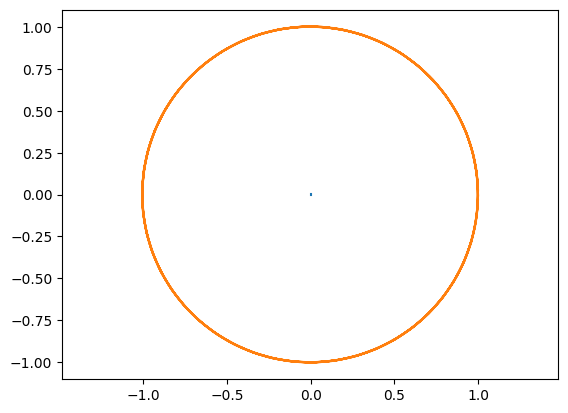

In [8]:
#Plotting results for Earth orbit
plot.plot(x_results[:, 0, 0], x_results[:, 0, 1], label='sun')
plot.plot(x_results[:, 1, 0], x_results[:, 1, 1], label='earth')
plot.axis('equal')
plot.show()

**Problem 2:**

- Setting up a hypothetical solar system composed of three bodies: essnetially Earth, Sun, and Jupiter
- Jupiter-mass planet with a semi-major axis $a = 4\ \mathrm{A.U.}$ and an eccentricity $e = 0.6$.

In [9]:
#Setting up for a Jupiter-like object in eccentric orbit
#Repeating first steps from above to create arrays for 3 bodies

nbodies = 3
x = np.zeros([nbodies, 2])
v = np.zeros([nbodies, 2])
m = np.zeros([nbodies])
sun_initial(x,v,m)
earth_initial(x,v,m)

#Number of years (earth orbits) to run
tfinal = 200 * torbit
#Number of steps
nsteps = int(tfinal / dt)
x_results = np.zeros([nsteps, nbodies, 2])
e_results = np.zeros([nsteps, 3])

#Adding in Jupiter
semi_major = 4 * AU
eccentricity = 0.6
vorbit = np.sqrt(G * mass_solar / semi_major * (1 + eccentricity) / (1 - eccentricity))
x[2] = np.array([(1 - eccentricity) * semi_major, 0])
v[2] = np.array([0, vorbit])
m[2] = mass_jupiter

#Adjust solar velocity to make center-of-mass velocity zero
v[0] += np.array([0, - vorbit * mass_jupiter / mass_solar])

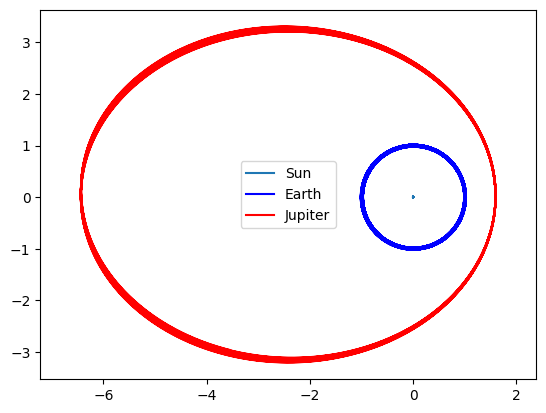

In [10]:
#Now doing the integration

a = accelerations(x, m)
#Take a half-step to start the system
v = v + 0.5 * dt * a
for i in range(nsteps):
    (x, v) = leapfrog(x, v, m, dt)
    x_results[i] = x
    e_results[i] = energies(x, v, m)

plot.plot(x_results[:, 0, 0], x_results[:, 0, 1], label='Sun')
plot.plot(x_results[:, 1, 0], x_results[:, 1, 1], 'b', label='Earth')
plot.plot(x_results[:, 2, 0], x_results[:, 2, 1], 'r', label='Jupiter')
plot.legend()
plot.axis('equal')
plot.show()

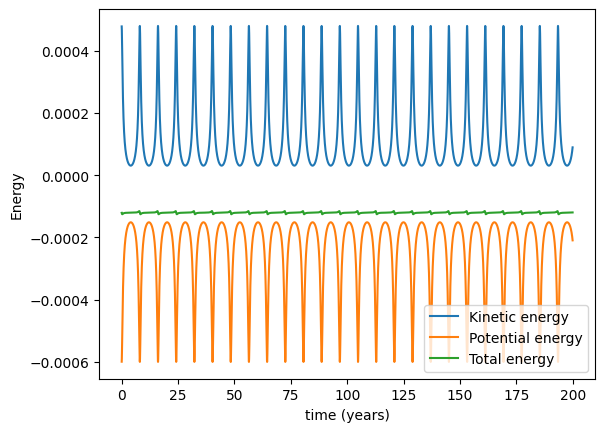

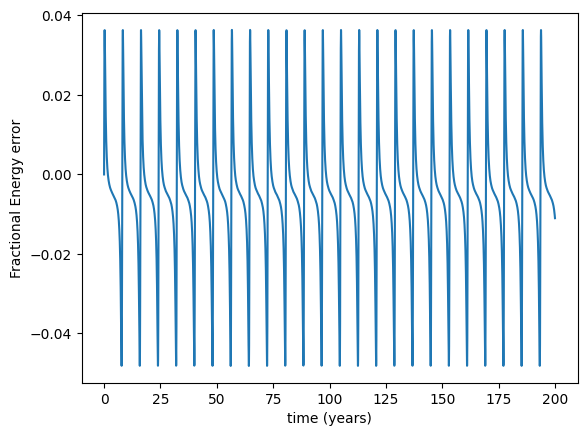

In [11]:
#We can see how energy is affected here

time = np.linspace(0.0, tfinal, num=nsteps, endpoint=False) / (2 * np.pi)
plot.plot(time, e_results[:, 0], label='Kinetic energy')
plot.plot(time, e_results[:, 1], label='Potential energy')
plot.plot(time, e_results[:, 2], label='Total energy')
plot.legend()
plot.xlabel('time (years)')
plot.ylabel('Energy')
plot.show()
plot.plot(time, (e_results[:, 2] - e_results[0, 2]) / e_results[0, 2], label='Total energy change')
plot.xlabel('time (years)')
plot.ylabel('Fractional Energy error')
plot.show()

Nothing much happens in this case except for a little precession of Jupiter.